<a href="https://colab.research.google.com/github/XuRui314/CS228-PGM/blob/main/CS_228_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir("/content/drive/MyDrive")
!ls

 Advertising.csv		     iris_analysis
 AI				     kaggle
'Colab Notebooks'		     kaggle.json
 CS228				     Pytorch-implementation-for-OCSGA
 dataset			     results_per_run.json
'E-Commerce Data | Kaggle (1).png'   Test-Models
'E-Commerce Data | Kaggle.png'	     TomBERT
 exploiting-BERT-thru-translation    UMT


In [7]:
# 第一次运行才要下载
# !git clone https://github.com/scheeloong/CS228.git

Cloning into 'CS228'...
remote: Enumerating objects: 507, done.
remote: Total 507 (delta 0), reused 0 (delta 0), pack-reused 507
Receiving objects: 100% (507/507), 74.60 MiB | 15.77 MiB/s, done.
Resolving deltas: 100% (199/199), done.
Checking out files: 100% (177/177), done.


In [8]:
# 设置第一次作业的工作区
import os
os.chdir("/content/drive/MyDrive/CS228/pa1")
!ls

a4.png		      CORRECTa7.png	    q6.mat
a5.png		      FinalP1.pdf	    q7.mat
a6_hist_real.png      hw1.pdf		    test.rtc
CORRECTa4.png	      P1.tex		    trained_mnist_model
CORRECTa5.png	      pa1.py		    W1HW.txt
CORRECTa6Corrupt.png  Problem7BayesNet.JPG
CORRECTa6Real.png     ps1


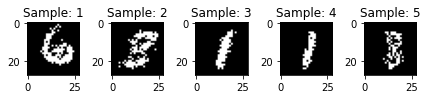

In [12]:
"""
CS 228: Probabilistic Graphical Models
Winter 2017
Programming Assignment 1: Bayesian Networks
Author: Aditya Grover
"""

import numpy as np 
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.io import loadmat

def plot_histogram(data, title='histogram', xlabel='value', ylabel='frequency', savefile='hist'):
  '''
  Plots a histogram.
  '''

  plt.figure()
  plt.hist(data)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.savefig(savefile, bbox_inches='tight')
  plt.show()
  plt.close()

  return

# Output 1 with probability prob, otherwise return 0
def sampleBinary(prob):
  if np.random.random_sample() < prob:
    return 1
  else:
    return 0

def sampleZ(prior_func):

  random_num = np.random.random_sample()
  aggregate = 0.0

  for i in range(25): # 25 values for both z1 and z2

    val = i*0.25-3
    aggregate += prior_func(val)

    if random_num < aggregate:
      return val

  print("UFU :D")
  return -5

def get_p_z1(z1_val):
  '''
  Computes the prior probability for variable z1 to take value z1_val.
  '''

  return bayes_net['prior_z1'][z1_val]

def get_p_z2(z2_val):
  '''
  Computes the prior probability for variable z2 to take value z2_val.
  '''

  return bayes_net['prior_z2'][z2_val]

def get_p_xk_cond_z1_z2(z1_val, z2_val, k):
  '''
  Computes the conditional likelihood of variable xk assumes value 1 
  given z1 assumes value z1_val and z2 assumes value z2_val. 
  '''

  return bayes_net['cond_likelihood'][(z1_val, z2_val)][0, k-1]

def get_p_x_cond_z1_z2(z1_val, z2_val):
  '''
  TODO
  '''
  pass

def get_pixels_sampled_from_p_x_joint_z1_z2():
  
  sampledZ1 = sampleZ(get_p_z1)
  sampledZ2 = sampleZ(get_p_z2)

  ans = np.array([])


  for pixel in range(28*28):
    ans = np.append(ans, sampleBinary(get_p_xk_cond_z1_z2(sampledZ1, sampledZ2, pixel)))
  '''
  TODO. Note that this function should only return the sampled values of pixel variables.
  '''
  return ans

def get_conditional_expectation(data):
  '''
  TODO
  '''
  pass

def q4():
  '''
  Plots the pixel variables sampled from the joint distribution as 28 x 28 images. Rest is TODO.
  '''

  plt.figure()
  for i in range(5):
      plt.subplot(1, 5, i+1)
      plt.imshow(get_pixels_sampled_from_p_x_joint_z1_z2().reshape(28, 28), cmap='gray')
      plt.title('Sample: ' + str(i+1))
  plt.tight_layout()
  plt.savefig('a4', bbox_inches='tight')
  plt.show()
  plt.close()

  return

def q5():
  '''
  Plots the expected images for each latent configuration on a 2D grid. Rest is TODO.
  '''

  canvas = np.empty((28*len(disc_z1), 28*len(disc_z2)))
  for i, z1_val in enumerate(disc_z1):
      for j, z2_val in enumerate(disc_z2):
          canvas[(len(disc_z1)-i-1)*28:(len(disc_z2)-i)*28, j*28:(j+1)*28] = \
          get_p_x_cond_z1_z2(z1_val, z2_val).reshape(28, 28)

  plt.figure()        
  plt.imshow(canvas, cmap='gray')
  plt.tight_layout()
  plt.savefig('a5', bbox_inches='tight')
  plt.show()
  plt.close()

  return

def q6():
  '''
  Loads the data and plots the histograms. Rest is TODO.
  '''

  mat = loadmat('q6.mat')
  val_data = mat['val_x']
  test_data = mat['test_x']

  '''
  TODO
  '''
  
  plot_histogram(real_marginal_log_likelihood, title='Histogram of marginal log-likelihood for real data',
       xlabel='marginal log-likelihood', savefile='a6_hist_real')

  plot_histogram(corrupt_marginal_log_likelihood, title='Histogram of marginal log-likelihood for corrupted data',
    xlabel='marginal log-likelihood', savefile='a6_hist_corrupt')

  return

def q7():
  '''
  Loads the data and plots a color coded clustering of the conditional expectations. Rest is TODO.
  '''

  mat = loadmat('q7.mat')
  data = mat['x']
  labels = mat['y']

  mean_z1, mean_z2 = get_conditional_expectation(data)

  plt.figure() 
  plt.scatter(mean_z1, mean_z2, c=labels)
  plt.colorbar()
  plt.grid()
  plt.savefig('a7', bbox_inches='tight')
  plt.show()
  plt.close()

  return

def load_model(model_file):
  '''
  Loads a default Bayesian network with latent variables (in this case, a variational autoencoder)
  '''

  with open('trained_mnist_model', 'rb') as infile:
    cpts = pkl.load(infile, encoding='bytes')

  model = {}
  model['prior_z1'] = cpts[0]
  model['prior_z2'] = cpts[1]
  model['cond_likelihood'] = cpts[2]

  return model

def main():

  global disc_z1, disc_z2
  n_disc_z = 25
  disc_z1 = np.linspace(-3, 3, n_disc_z)
  disc_z2 = np.linspace(-3, 3, n_disc_z)

  global bayes_net
  bayes_net = load_model('trained_mnist_model')

  '''
  TODO: Using the above Bayesian Network model, complete the following parts.
  '''
  q4()
  return
  q5()
  q6()
  q7()

  return

if __name__== '__main__':

  main()

## Start

上面留了一份初始版，要是你想自己写一版可以直接用 :)